In [1]:
import numpy as np 

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import (
    pyplot as plt,
    cm
)
from sklearn.decomposition import PCA

import pandas as pd

In [2]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process

    """

    def __init__(self, n_clusters, n_init=None, max_iter=400, tol=50, verbose=False, random_state=0):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.random_state = random_state
        self.best_sse = 10**20


    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        #problem 1
          
        np.random.seed(self.random_state)
        self.myu = X[np.random.choice(len(X), self.n_clusters, False)]
        a = np.ones(X.shape[0]).reshape(-1, 1)
        X_cluster = np.hstack([X, a])

        for j in range(self.max_iter):
            self._update_cluster(X_cluster)
            self._update_centroid(X_cluster)   
            self._SSE_(X_cluster)

            if self.verbose:
                print(f" interation: {j}, best SSE: {self.best_sse}")

            if np.mean(self.myu) <= self.tol:
                break
        
            


        return self

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        y_pred = np.zeros(len(X))
        # loop through all test data set
        for i in range(len(X)):
            d = 10**20
            for j in range(self.record_cluster):
                dist = np.linalg.norm(X[i] - self.record_myu[j])

                if dist < d:
                    d = dist 
                    y_pred[i] = j
        return y_pred

    
    def _SSE_(self, X):
        sse = 0
        for n in range(len(X)):
            for k in range(self.n_clusters):
                diff = np.power(X[n, :-1] - self.myu[k], 2)
                r = 1 if X[n, -1] == k else 0
                sse += np.sum(r * diff)        
        if self.best_sse > sse:
          self.best_sse = sse
          self.record_myu = self.myu
          self.record_cluster = self.n_clusters

    def _update_cluster(self, X):
        # loop through all data point
        for i in range(len(X)):
            d = 10 ** 20
            # loop through the centroids
            for j in range(self.n_clusters):
                
                #calculates euclidean distance between point and center
                dist = np.linalg.norm(X[i, :-1] - self.myu[j])

                #assign data point to closest cluster
                if dist < d:
                    d = dist
                    X[i, -1] = j

    def _update_centroid(self, X):
        
        for i in range(self.n_clusters):
            self.myu[i] = np.mean(X[X[:, -1]== i, : -1], axis=0)


In [3]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process

    """

    def __init__(self, n_clusters, n_init=None, max_iter=400, tol=50, verbose=False, random_state=0):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.random_state = random_state
        self.best_sse = 10**20


    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        #problem 1
          
        np.random.seed(self.random_state)
        self.myu = X[np.random.choice(len(X), self.n_clusters, False)]
        a = np.ones(X.shape[0]).reshape(-1, 1)
        X_cluster = np.hstack([X, a])

        for j in range(self.max_iter):
            self._update_cluster(X_cluster)
            self._update_centroid(X_cluster)   
            self._SSE_(X_cluster)

            if self.verbose:
                print(f" interation: {j}, best SSE: {self.best_sse}")

            if np.mean(self.myu) <= self.tol:
                break
        
            


        return self

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        y_pred = np.zeros(len(X))
        # loop through all test data set
        for i in range(len(X)):
            d = 10**20
            for j in range(self.record_cluster):
                dist = np.linalg.norm(X[i] - self.record_myu[j])

                if dist < d:
                    d = dist 
                    y_pred[i] = j
        return y_pred

    
    def _SSE_(self, X):
        sse = 0
        for n in range(len(X)):
            for k in range(self.n_clusters):
                diff = np.power(X[n, :-1] - self.myu[k], 2)
                r = 1 if X[n, -1] == k else 0
                sse += np.sum(r * diff)        
        if self.best_sse > sse:
          self.best_sse = sse
          self.record_myu = self.myu
          self.record_cluster = self.n_clusters

    def _update_cluster(self, X):
        # loop through all data point
        for i in range(len(X)):
            d = 10 ** 20
            # loop through the centroids
            for j in range(self.n_clusters):
                
                #calculates euclidean distance between point and center
                dist = np.linalg.norm(X[i, :-1] - self.myu[j])

                #assign data point to closest cluster
                if dist < d:
                    d = dist
                    X[i, -1] = j

    def _update_centroid(self, X):
        
        for i in range(self.n_clusters):
            self.myu[i] = np.mean(X[X[:, -1]== i, : -1], axis=0)

    

In [4]:
def silhouette_score(X, labels):
    
    x_cluster = np.hstack([X, labels])
    n_cluster = len(set(labels.flatten()))
    centroid = X[np.random.choice(len(X), n_cluster, False)]

    coef = np.zeros(len(X))
    for i in range(n_cluster):
        
        centroid[i] = np.mean(x_cluster[x_cluster[:, -1] == i, : -1], axis = 0)

    for i in range(len(X)):
        cluster = labels[i]
        closest = (X[i] - centroid[[x for x in range(n_cluster) if x != cluster]]).argmin()

        b = np.linalg.norm(X[i] -x_cluster[x_cluster[:, -1] == closest ,: -1])
        a = np.linalg.norm(X[i] - x_cluster[x_cluster[:, -1] == cluster, : -1])

        coef[i] = (b - a)/ max([a, b])
              
    return coef

def silhouette ( cluster_labels, features, labels, y_km):
 
    silhouette_vals = silhouette_score(features, labels)
    silhouette_avg = np.average(silhouette_vals)

    y_ax_lower, y_ax_upper = 0, 0
    n_clusters = len(set(labels.ravel()))
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

In [5]:
X, _ = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0, shuffle=True)

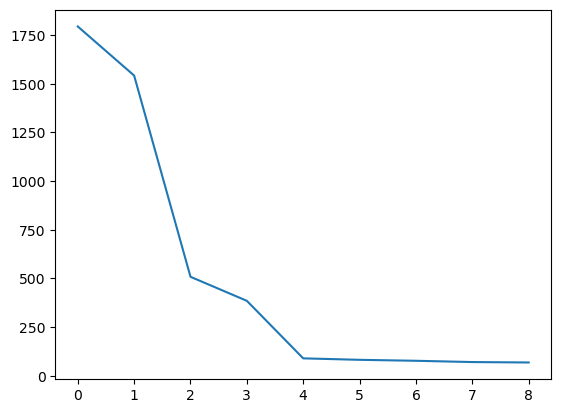

In [6]:
def elbow(feature, kmean, max_iter, tol, rand):
    losses = []
    for i in range(1, kmean):
        m = ScratchKMeans(i, max_iter=max_iter, tol=tol, random_state=rand).fit(feature)
        losses.append(m.best_sse)

    plt.plot(losses)

elbow(X, 10, 200, 50, 1111)

In [7]:
model = ScratchKMeans(n_clusters=4, max_iter=200, tol= 50, random_state=1111).fit(X)
y = model.predict(X)
y = y.reshape(-1, 1)
model.best_sse

384.90040968158945

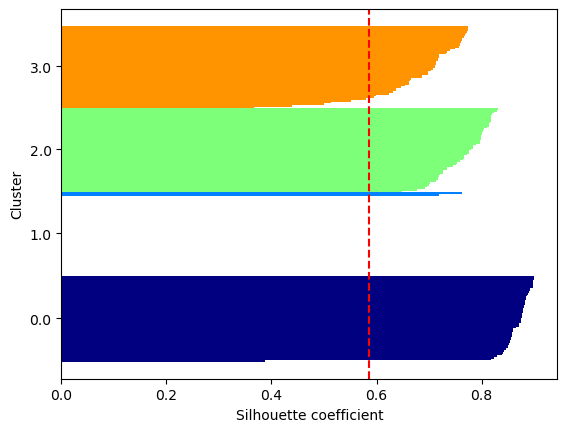

In [8]:
names = y.flatten()

categories = list(set(names.ravel()))


silhouette(categories, X, y, names)

Cluster Analysis

In [22]:
data = pd.read_csv("C:\\Users\\cbt04\\Desktop\\Wholesale customers data.csv")

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [42]:
pca = PCA(n_components=2)
pca = pca.fit(data)
data_pca = pca.transform(data)

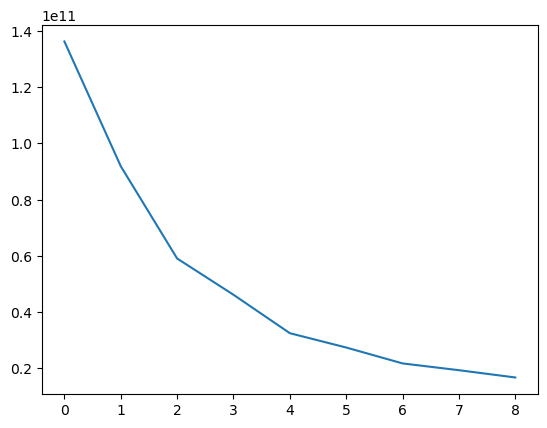

In [44]:
elbow(data_pca, 10, 200, 500, 123)

In [41]:
model = ScratchKMeans(9, max_iter=200, tol=500, random_state=123).fit(data_pca)
pred = model.predict(data_pca)

At 8 cluster, the SSE began to plateau. This suggest that after this point there isn't a significant change in the performance of the model. So, to minimize the computing power required to create 12 clusters, I chose 9 clusters instead. This way, the model would be fast and effecient.

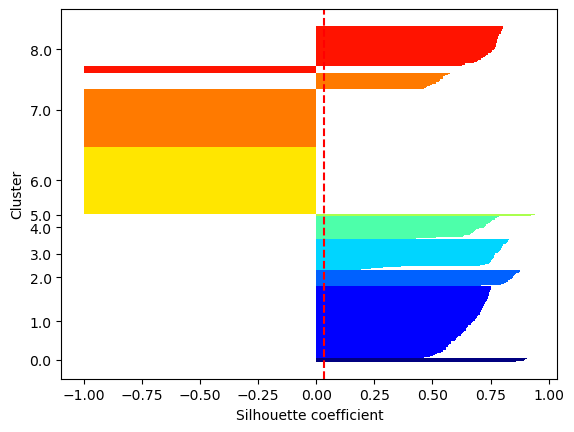

In [28]:
silhouette(list(set(pred.ravel())), data_pca, pred.reshape(-1, 1), pred.ravel())

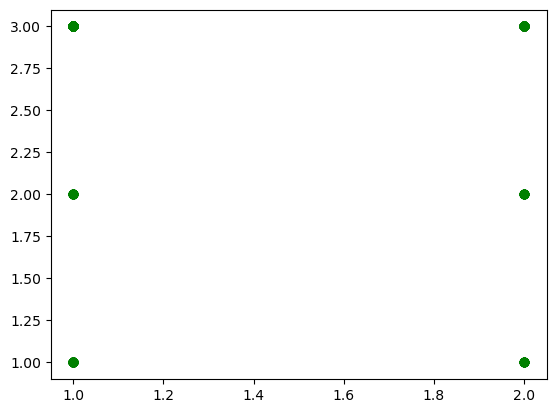

In [30]:
interest = list(data.keys()[0:2])

a = data[interest].values

plt.scatter(a[:, 0], a[:, 1], c="g")

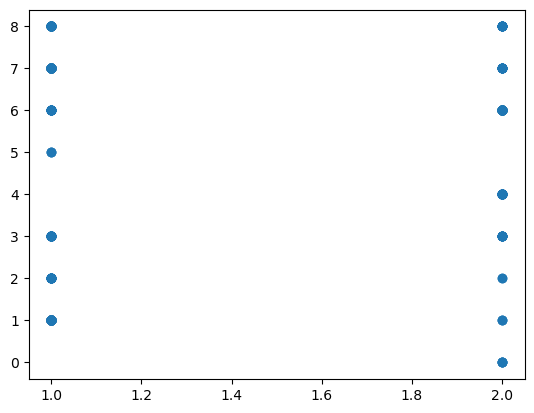

In [31]:
plt.scatter(a[:, 0], pred.reshape(-1, 1))

The region and channel variable represent categorical feature and target variables respectively in the dataset. In the original dataset, there were only 3 regions for the 2 channels. However, by clustering 4 addtional significant regions were found. By clustering, the customers were better fitted to a region. Clustering unravelled hidden categories of customers from the data.

In [33]:
pred = pd.DataFrame(pred, columns=["target"])
data.drop(["Region"], inplace=True, axis=1)
data = pd.concat([data, pred], axis=1)

In [34]:
data.groupby(["target"]).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
target,,,,,,,
0.0,2.000000,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000
1.0,1.031579,2768.715789,2674.221053,3066.705263,2004.136842,801.578947,829.757895
2.0,1.095238,43491.333333,5765.047619,5280.380952,8815.809524,756.857143,4503.523810
3.0,1.250000,26605.950000,5752.875000,7406.900000,4677.800000,1513.875000,2401.875000
4.0,2.000000,6683.066667,17468.033333,26658.933333,1986.300000,11872.900000,2531.200000
5.0,1.000000,85779.666667,12503.666667,12619.666667,13991.666667,2159.000000,3958.000000
6.0,1.793103,4443.229885,8716.586207,12616.689655,1456.172414,5391.333333,1512.425287
7.0,1.123711,9844.824742,2441.123711,3358.123711,3175.773196,805.618557,926.577320
8.0,1.177419,17938.580645,2760.290323,3736.822581,3863.419355,895.677419,1268.612903


<Axes: xlabel='target'>

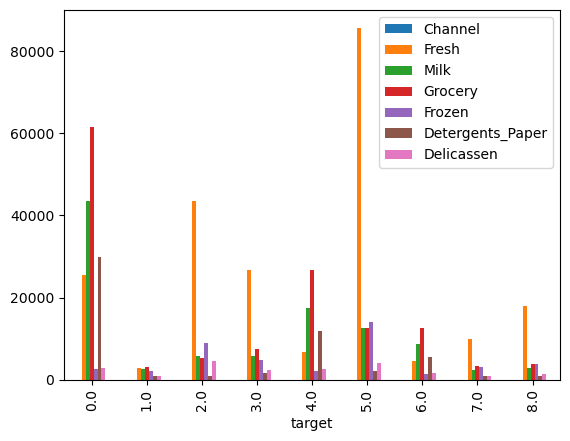

In [35]:
data.groupby(["target"]).mean().plot(kind="bar",subplots=False)

array([<Axes: xlabel='target'>, <Axes: xlabel='target'>,
       <Axes: xlabel='target'>, <Axes: xlabel='target'>,
       <Axes: xlabel='target'>, <Axes: xlabel='target'>,
       <Axes: xlabel='target'>], dtype=object)

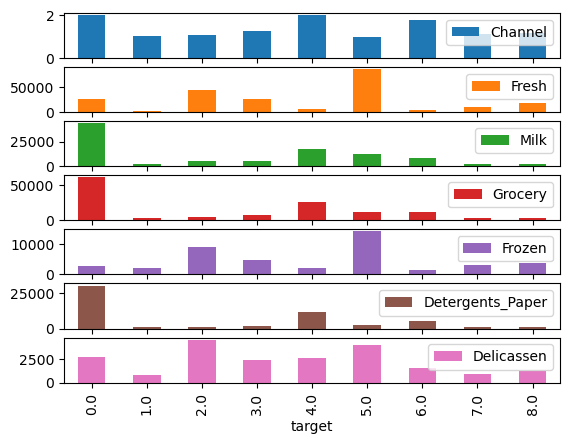

In [36]:
data.groupby(["target"]).mean().plot(kind="bar",subplots=True, title=[None, None, None, None, None, None, None])

Advantages of DBSCAN
1. Robust to noise
2. Does not require specifying the number of cluster
3. Handles clusters of different shapes and sizes
4. Works well with high-dimensional data
Disadvantages of DBSCAN
1. Sensitivity to paramter settings
2. Difficulty with varying density
3. Computationally intensive
Advantages fo t-SNE:
1. Preserves local and global structure
2. Good for visualization
3. Flexible embedding
Disadvantages of t-SNE
1. Computationallt expensive
2. Non-linear mapping
Adantages of LLE:
1. Preserve local structure
2. works well for non-linear manifolds
3. Computationally effecient
Disadvantage of LLE
1. Parameter sensitivity
2. Global structure may not be well preserved
3. Difficulty with high-dimensional data

In [37]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [39]:
data = pd.read_csv("C:\\Users\\cbt04\\Desktop\\Wholesale customers data.csv")

data_sne = TSNE(n_components=2).fit_transform(data)

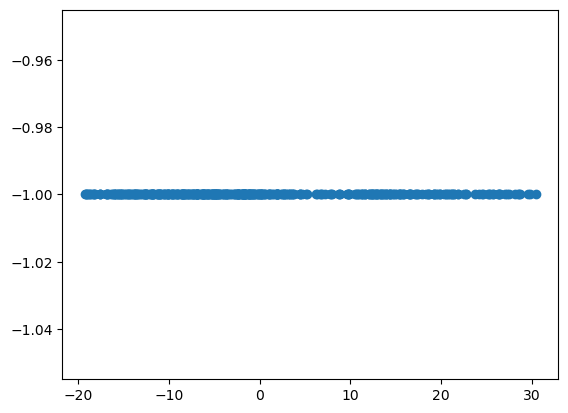

In [40]:
pred_sne = DBSCAN().fit_predict(data_pca)

plt.scatter(data_sne[:, 0], pred_sne.reshape(-1, 1))